In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import PredictionError
from datetime import datetime

In [2]:
df = sns.load_dataset("mpg")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.drop("name",axis=1,inplace=True)

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [12]:
df.shape

(392, 8)

## EDA : Univariate

In [13]:
df.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model_year       13
origin            3
dtype: int64

<Axes: xlabel='cylinders', ylabel='count'>

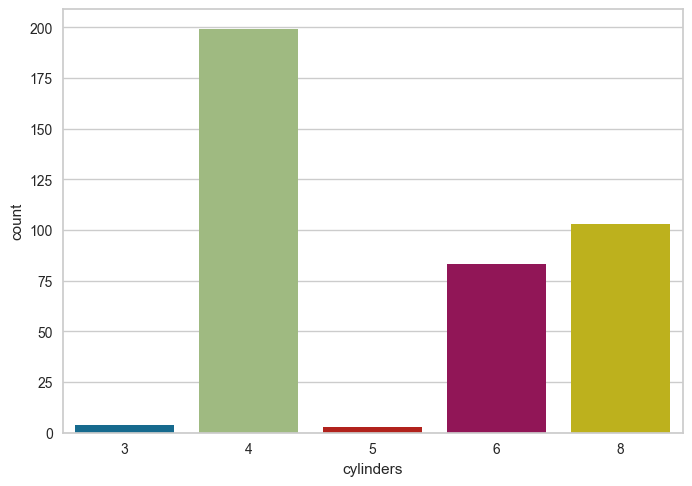

In [14]:
sns.countplot(x= df["cylinders"],data = df)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [16]:
df['model_year'] = df['model_year'] + 1900

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,1970,usa
1,15.0,8,350.0,165.0,3693,11.5,1970,usa
2,18.0,8,318.0,150.0,3436,11.0,1970,usa
3,16.0,8,304.0,150.0,3433,12.0,1970,usa
4,17.0,8,302.0,140.0,3449,10.5,1970,usa


<Axes: xlabel='model_year', ylabel='count'>

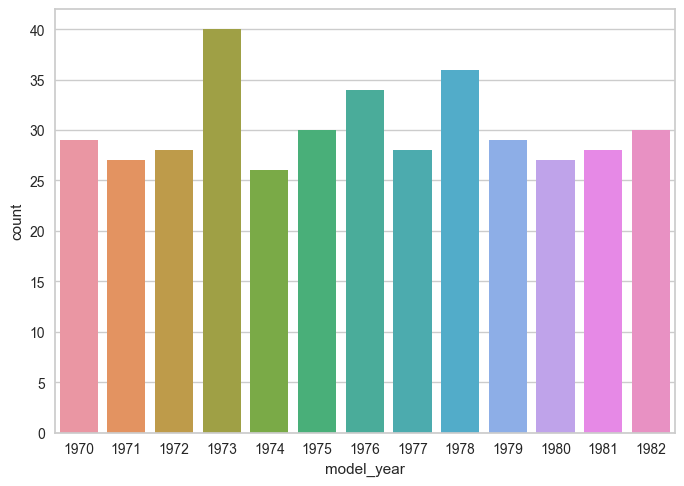

In [18]:
sns.countplot(x=df["model_year"],data=df)

<Axes: xlabel='origin', ylabel='count'>

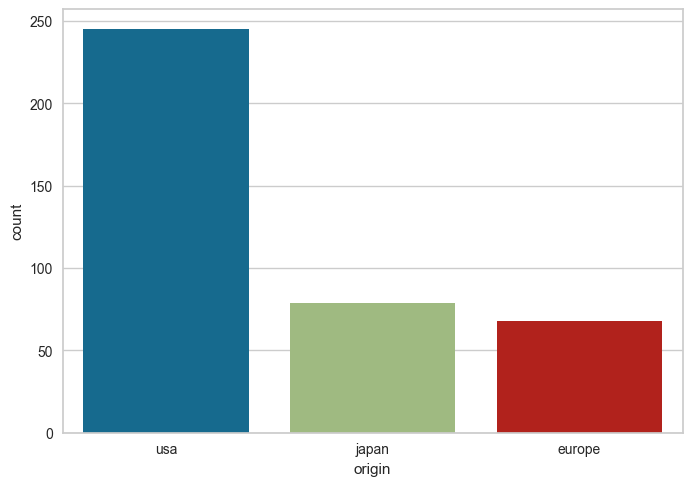

In [19]:
sns.countplot(x= df["origin"],data = df)

<Axes: ylabel='Density'>

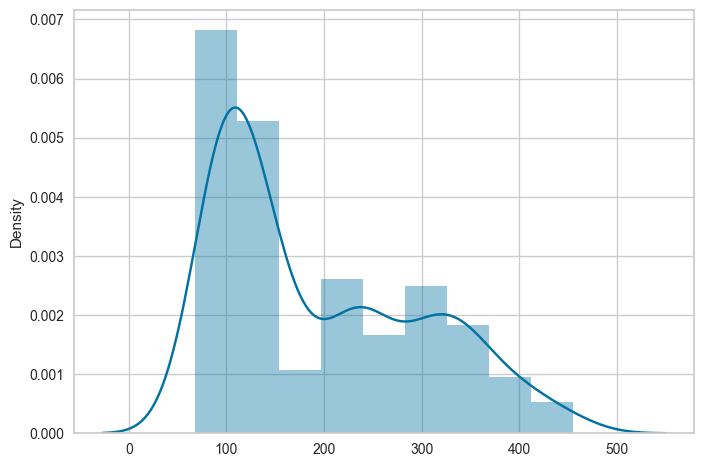

In [20]:
sns.distplot(x=df["displacement"])

<Axes: ylabel='Density'>

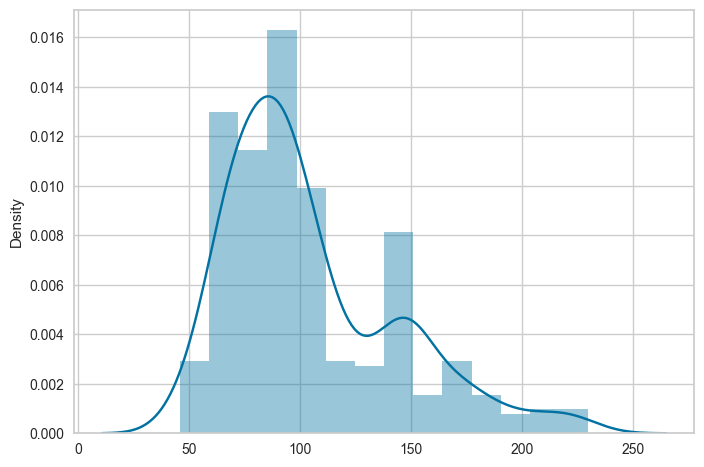

In [21]:
sns.distplot(x=df["horsepower"])

<Axes: ylabel='Density'>

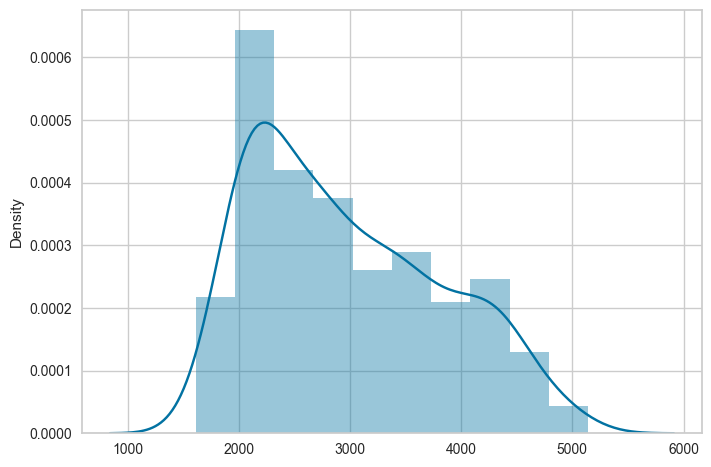

In [22]:
sns.distplot(x=df["weight"])

## EDA: Bivariate 

<Axes: xlabel='cylinders', ylabel='mpg'>

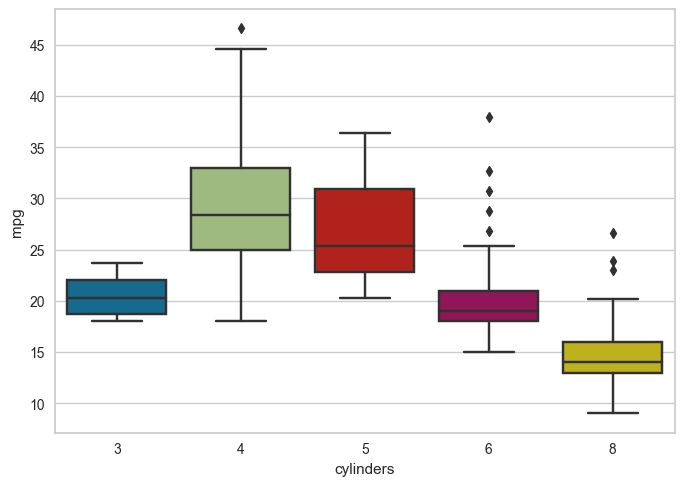

In [23]:
sns.boxplot(data=df,x="cylinders",y="mpg")

<Axes: xlabel='model_year', ylabel='mpg'>

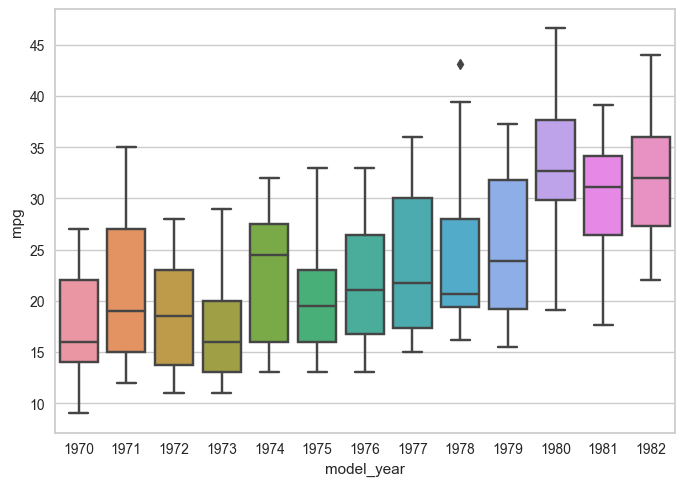

In [24]:
sns.boxplot(data=df,x="model_year",y="mpg")

<Axes: xlabel='origin', ylabel='mpg'>

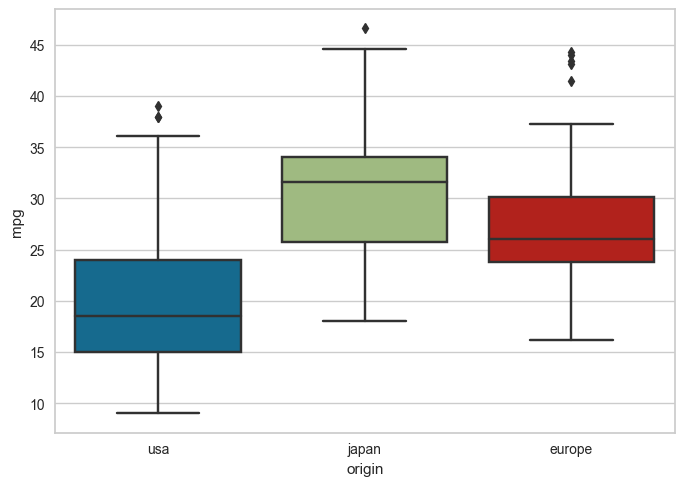

In [25]:
sns.boxplot(data=df,x="origin",y="mpg")

## EDA: Multivariate

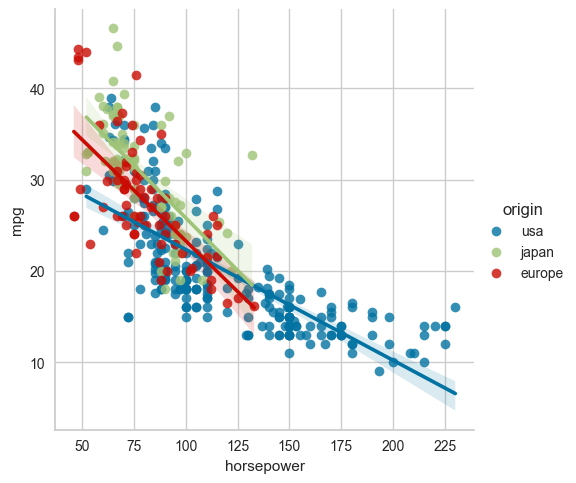

In [26]:
sns.lmplot(data=df,x="horsepower",y="mpg",hue="origin")

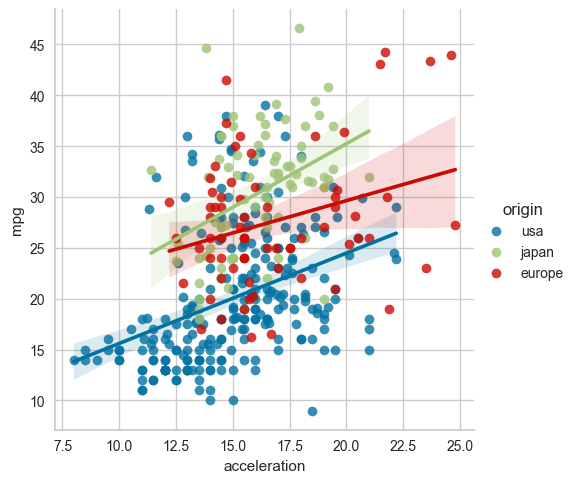

In [27]:
sns.lmplot(data=df,x="acceleration",y="mpg",hue="origin")

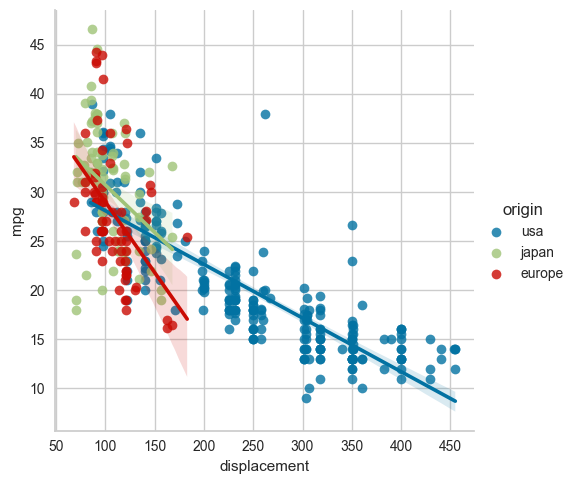

In [28]:
sns.lmplot(data=df,x="displacement",y="mpg",hue="origin")

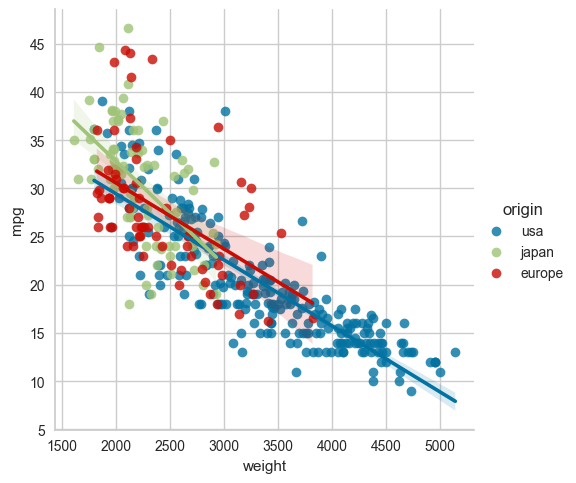

In [29]:
sns.lmplot(data=df,x="weight",y="mpg",hue="origin")

## Heatmap of correlation matrix

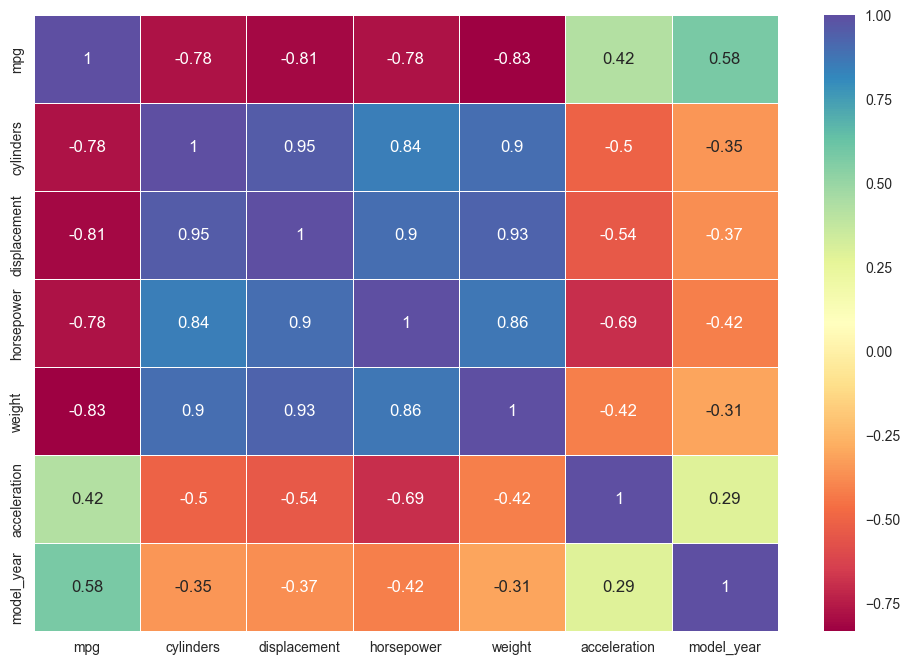

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,lw=0.5,cmap="Spectral")
plt.show()

- dropping accelaration due to lowest correlation with mpg
- dropping displacement due to high(above 90 percent),more no. of correlation with other variables.as it will give the same effect on target as others and to avoid overfitting

In [31]:
df.drop(["acceleration","displacement"],axis=1,inplace=True)

In [32]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin
0,18.0,8,130.0,3504,1970,usa
1,15.0,8,165.0,3693,1970,usa
2,18.0,8,150.0,3436,1970,usa
3,16.0,8,150.0,3433,1970,usa
4,17.0,8,140.0,3449,1970,usa


In [33]:
df["age"] = datetime.today().year - df["model_year"]

In [34]:
df.head()

,mpg,cylinders,horsepower,weight,model_year,origin,age
0,18.0,8,130.0,3504,1970,usa,53
1,15.0,8,165.0,3693,1970,usa,53
2,18.0,8,150.0,3436,1970,usa,53
3,16.0,8,150.0,3433,1970,usa,53
4,17.0,8,140.0,3449,1970,usa,53


In [35]:
df.drop(["model_year"],axis=1,inplace=True)

In [36]:
df.head()

,mpg,cylinders,horsepower,weight,origin,age
0,18.0,8,130.0,3504,usa,53
1,15.0,8,165.0,3693,usa,53
2,18.0,8,150.0,3436,usa,53
3,16.0,8,150.0,3433,usa,53
4,17.0,8,140.0,3449,usa,53


In [37]:
df = pd.get_dummies(df,drop_first=True)

In [38]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_japan,origin_usa
0,18.0,8,130.0,3504,53,False,True
1,15.0,8,165.0,3693,53,False,True
2,18.0,8,150.0,3436,53,False,True
3,16.0,8,150.0,3433,53,False,True
4,17.0,8,140.0,3449,53,False,True


In [39]:
x=df.drop(["mpg"],axis=1)

In [40]:
y=df['mpg']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
y_train

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
       ... 
72     15.0
107    18.0
272    23.8
352    29.9
103    11.0
Name: mpg, Length: 313, dtype: float64

In [43]:
lm_model = LinearRegression()

In [44]:
lm_model.fit(x_train,y_train)

LinearRegression()

In [45]:
y_pred = lm_model.predict(x_test)

In [46]:
def evaluation_metrics(actual,pred):
    MAE = mean_absolute_error(actual,pred)
    MSE = mean_squared_error(actual,pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    score  = r2_score(actual,pred)
    print("r2_socre:",score,"\n","Mean Squared Error:",MSE,"\n","Root Mean Squared Error:",RMSE,"\n","Mean Absolute Error:",MAE)

In [47]:
evaluation_metrics(y_test,y_pred)

r2_socre: 0.7798249880881916 
 Mean Squared Error: 11.237861022823013 
 Root Mean Squared Error: 3.3522919059686633 
 Mean Absolute Error: 2.5188281576150846


In [48]:
visualizer = PredictionError(lm_model)

In [49]:
accuracies = cross_val_score(estimator=lm_model,X=x_train,y=y_train,cv=10)

In [50]:
accuracies

array([0.83385985, 0.8017547 , 0.83571526, 0.79337835, 0.74392253,
       0.78022115, 0.85414984, 0.76313671, 0.81547906, 0.88691579])

In [51]:
accuracies.mean()

0.8108533245510495

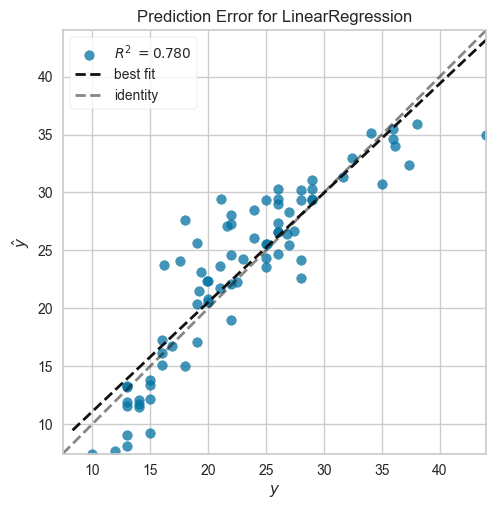

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [52]:
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test)

visualizer.show()

In [53]:
lr_model2 = LinearRegression()

In [54]:
parameters = {'n_jobs': [1,10,100],
             "copy_X":[True,False],
             "fit_intercept":[True,False],
             "positive":[True,False]}

In [55]:
lr_cv_model  = GridSearchCV(estimator = lr_model2, param_grid=parameters,cv=10)

In [56]:
lr_cv_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [1, 10, 100],
                         'positive': [True, False]})

In [57]:
lr_cv_model.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [58]:
ypred = lr_cv_model.predict(x_test)

In [59]:
evaluation_metrics(y_test,ypred)

r2_socre: 0.7798249880881916 
 Mean Squared Error: 11.237861022823013 
 Root Mean Squared Error: 3.3522919059686633 
 Mean Absolute Error: 2.5188281576150846


In [60]:
accuracies = cross_val_score(estimator=lm_model,X=x_train,y=y_train,cv=10)
accuracies.mean()

0.8108533245510495

In [61]:
# An Accuracy of 81 percent is achieved.